In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import csv

In [2]:
data = pd.read_csv("adult.csv")
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.workclass = data.workclass.replace({'?':'Not-Known'})
data.occupation = data.occupation.replace({'?':'Not-Known'})
data = data.rename(columns = {'education.num':'education_num'})
data = data.rename(columns ={'marital.status':'marital_status'})
data = data.rename(columns ={'capital.gain':'capital_gain'})
data = data.rename(columns ={'capital.loss':'capital_loss'})
data = data.rename(columns = {'hours.per.week':'hours_per_week'})
data = data.rename(columns ={'native.country':'native_country'})
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Not-Known,77053,HS-grad,9,Widowed,Not-Known,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Not-Known,186061,Some-college,10,Widowed,Not-Known,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Text(0.5, 1.0, 'Gender')

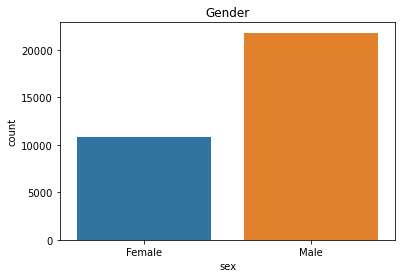

In [6]:
# basic plot
# see Gender ratio
sns.countplot(x = 'sex',data = data)
plt.title("Gender")

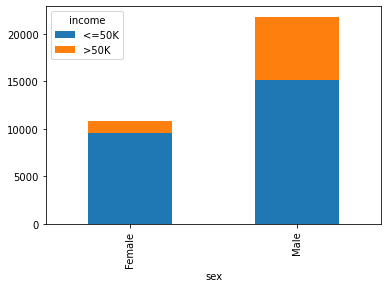

In [77]:
ct = pd.crosstab(data.sex, data.income)
ct.plot.bar(stacked=True)

About 1:2 female vs male

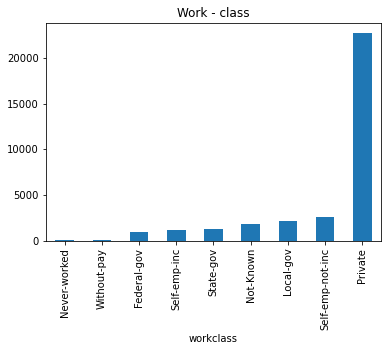

In [7]:
data_workclass = data.groupby('workclass').sex.count().sort_values()
plt.title('Work - class')
data_workclass.plot.bar()

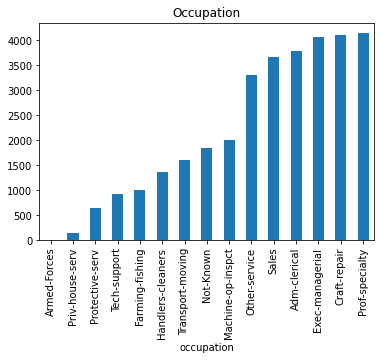

In [ ]:
data_occ = data.groupby('occupation').sex.count().sort_values()
plt.title('Occupation')
data_occ.plot.bar()

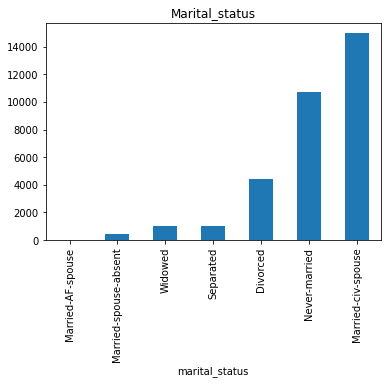

In [ ]:
data_marital = data.groupby('marital_status').sex.count().sort_values()
plt.title('Marital_status')
data_marital.plot.bar()

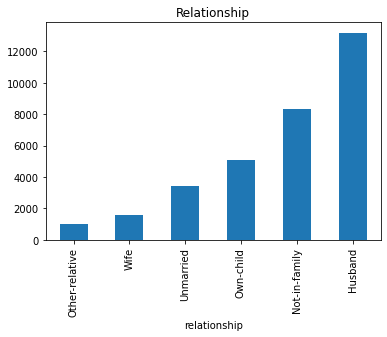

In [ ]:
data_rel = data.groupby('relationship').sex.count().sort_values()
plt.title('Relationship')
data_rel.plot.bar()

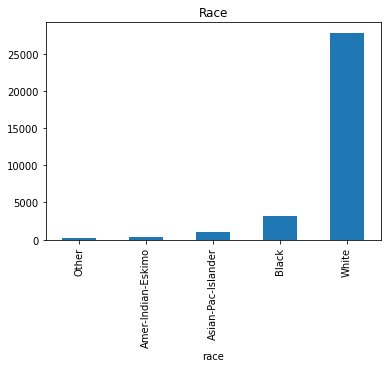

In [ ]:
data_race = data.groupby('race').sex.count().sort_values()
plt.title('Race')
data_race.plot.bar()

Chi-square test of independence for Gender and Income

In [ ]:
data2 = pd.crosstab(data.sex , data.income)
print("Following is contigency table")
data2

Following is contigency table


income,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662


In [ ]:
a1 = [9592,1179]
a2 = [15128,6662]

a3 = np.array([a1,a2])

from scipy import stats
stats.chi2_contingency(a3)

chi2_stat, p_val, dof, ex = stats.chi2_contingency(a3)
print("Chisquare test value is : ",chi2_stat)
print("\nDegree of freedom is : ",dof)
print("\nP-Value is : ",p_val)
print("\nExpected observation contiggency table\n")
print(ex)

Chisquare test value is :  1517.813409134445

Degree of freedom is :  1

P-Value is :  0.0

Expected observation contiggency table

[[ 8177.24025675  2593.75974325]
 [16542.75974325  5247.24025675]]


chi2_stat > p_val, therefore reject null hypothesis. There is relationship between Gender and Income

In [ ]:
# check whether relationship is positive
female = sum(a1)
female_less50k = a1[0]
less50k = a3[0][0] + a3[1][0]
N = sum(sum(a3))

if female_less50k > (female*less50k)/N : print("positive")

positive


Females -> less pay
males -> more pay

In [ ]:
# incomewise percent distribution of gender
data3 = (data.groupby(['sex','income']).workclass.count()/data.groupby(['sex']).workclass.count())*100
data3

sex     income
Female  <=50K     89.053941
        >50K      10.946059
Male    <=50K     69.426342
        >50K      30.573658
Name: workclass, dtype: float64

Male make more money than female if income >50K while Female make more money if income <=50K.

In [ ]:
data4 = (data.groupby(['sex','income','workclass']).workclass.count()/data.groupby(['sex','income']).workclass.count())*100
data4

sex     income  workclass       
Female  <=50K   Federal-gov          2.700167
                Local-gov            7.099666
                Never-worked         0.020851
                Not-Known            8.204754
                Private             73.248540
                Self-emp-inc         0.979983
                Self-emp-not-inc     3.304837
                State-gov            4.389074
                Without-pay          0.052127
        >50K    Federal-gov          4.749788
                Local-gov           13.061917
                Not-Known            4.410517
                Private             61.577608
                Self-emp-inc         3.477523
                Self-emp-not-inc     6.955047
                State-gov            5.767600
Male    <=50K   Federal-gov          2.181386
                Local-gov            5.255156
                Never-worked         0.033051
                Not-Known            5.671602
                Private             70.776044
 

3% more number of private female employees is earning <=50K than male,while only 2% more number of more private male employee is earning >50K than female.

In [ ]:
data5 = (data.groupby(['sex','income','marital_status']).workclass.count()/data.groupby(['sex','income']).workclass.count())*100
data5

sex     income  marital_status       
Female  <=50K   Divorced                 25.990409
                Married-AF-spouse         0.083403
                Married-civ-spouse        9.414095
                Married-spouse-absent     2.022519
                Never-married            47.967056
                Separated                 6.401168
                Widowed                   8.121351
        >50K    Divorced                 15.182358
                Married-AF-spouse         0.508906
                Married-civ-spouse       63.952502
                Married-spouse-absent     0.932994
                Never-married            14.079729
                Separated                 1.441900
                Widowed                   3.901612
Male    <=50K   Divorced                  9.829455
                Married-AF-spouse         0.033051
                Married-civ-spouse       48.790323
                Married-spouse-absent     1.255949
                Never-married            36.

More divorced and unmarried female is earning <=50K than male , While More Male married-civ-spouse is earning >50K than Female.

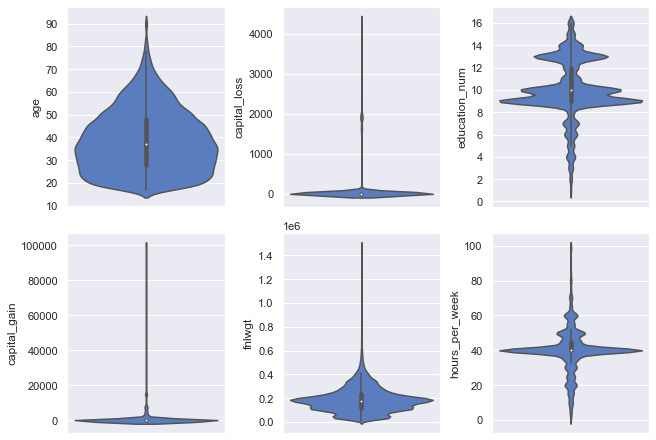

In [79]:
sns.set(rc={'figure.figsize':(11, 4)})
numeric_columns = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
n=len(numeric_columns)
fig,ax = plt.subplots(2,int(n/2), figsize=(9,6), constrained_layout=True, sharex=False)
for i in range(n):
    plt.sca(ax[int(i%2), int(i%3)])
    col = numeric_columns[i]
    sns.violinplot(x=None, y=col,
                    data=data, palette="muted", split=True)

fig.savefig('adult_numerical_distributions.png', dpi = 500)